<a href="https://colab.research.google.com/github/Thenkuzhali/Machine_Learning/blob/main/Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Data_sets/unsupervised/Online Retail.csv")

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [11]:
df.shape

(541909, 8)

In [10]:
df.CustomerID.nunique()

4372

In [13]:
df['Description'].nunique()

4223

In [15]:
# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [16]:
# Extract features from InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['Hour'] = df['InvoiceDate'].dt.hour

In [17]:
# Select relevant numerical features
features = ['Quantity', 'UnitPrice', 'Year', 'Month', 'Day', 'Hour']

In [18]:
# Handle missing values (fill or drop)
df = df.dropna(subset=features)

In [19]:
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[features])

In [20]:
# Apply K-Means
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust k (number of clusters) as needed
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [21]:
# Display cluster counts
print(df['Cluster'].value_counts())

Cluster
1    250781
0    248620
2     42475
3        31
4         2
Name: count, dtype: int64


In [22]:
# Save clustered data
df.to_csv("clustered_data.csv", index=False)

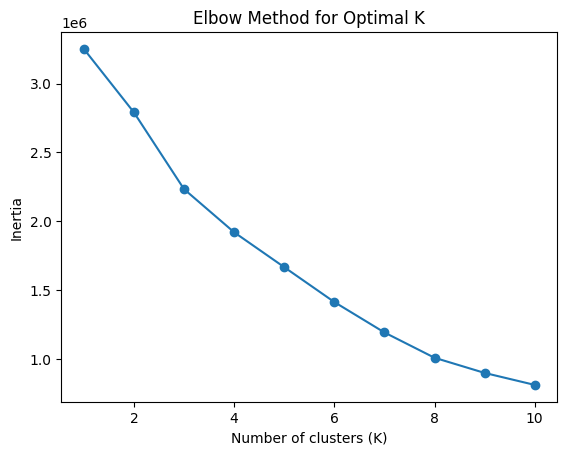

In [23]:
import matplotlib.pyplot as plt

inertia = []
K_range = range(1, 11)  # Trying 1 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

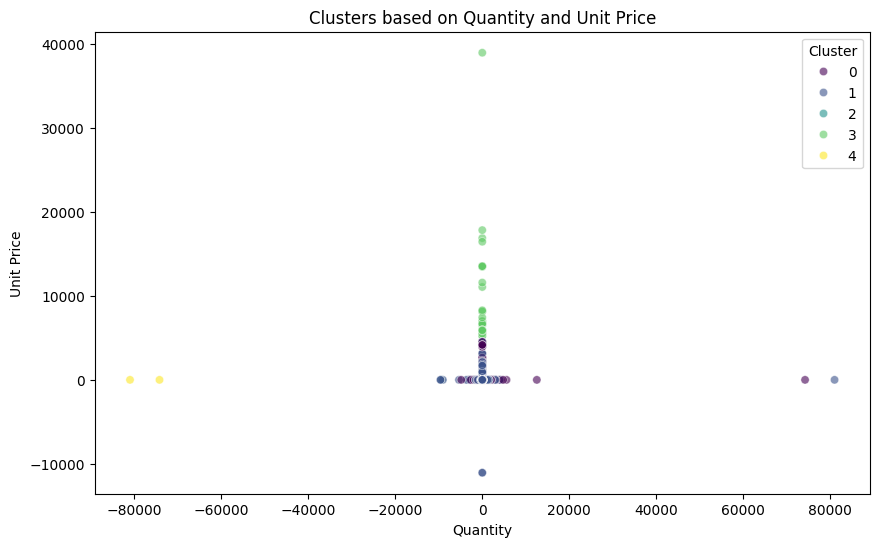

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Quantity', y='UnitPrice', hue='Cluster', palette='viridis', alpha=0.6)
plt.xlabel("Quantity")
plt.ylabel("Unit Price")
plt.title("Clusters based on Quantity and Unit Price")
plt.show()

In [25]:
# removing negative values

In [26]:
print("Negative Quantity:", df[df['Quantity'] < 0].shape[0])
print("Negative UnitPrice:", df[df['UnitPrice'] < 0].shape[0])

Negative Quantity: 10624
Negative UnitPrice: 2


In [27]:
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [28]:
print("Negative Quantity After Cleaning:", (df['Quantity'] < 0).sum())
print("Negative UnitPrice After Cleaning:", (df['UnitPrice'] < 0).sum())

Negative Quantity After Cleaning: 0
Negative UnitPrice After Cleaning: 0


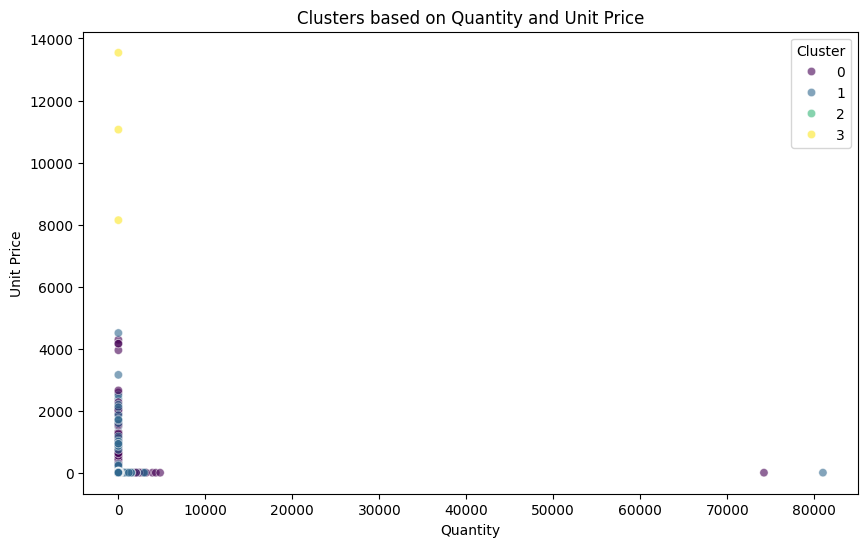

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Quantity', y='UnitPrice', hue='Cluster', palette='viridis', alpha=0.6)
plt.xlabel("Quantity")
plt.ylabel("Unit Price")
plt.title("Clusters based on Quantity and Unit Price")
plt.show()